# EX1) A demo of the Spectral Biclustering algorithm

[SpectralBiclustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralBiclustering.html#sklearn.cluster.SpectralBiclustering)

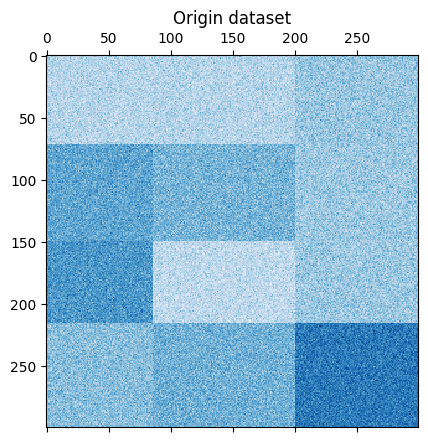

In [1]:
# Generate sample data

import matplotlib.pyplot as plt

from sklearn.datasets import make_checkerboard

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=42
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Origin dataset")
plt.show()

In [8]:
data.shape, rows.shape, columns.shape

((300, 300), (12, 300), (12, 300))

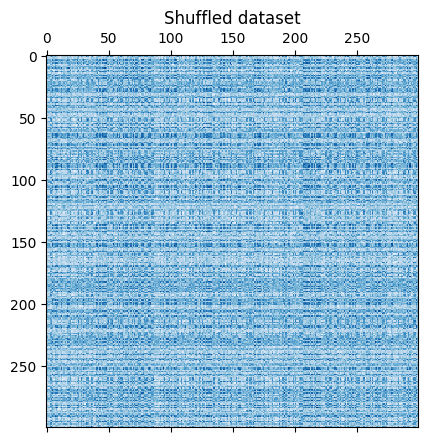

In [2]:
import numpy as np

rng = np.random.RandomState(0)
row_idx_shuffled = rng.permutation(data.shape[0])
col_idx_shuffled = rng.permutation(data.shape[1])

data = data[row_idx_shuffled][:, col_idx_shuffled]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
plt.show()

In [3]:
# Fitting SpetralBiclustering

from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score # 두 이중 클러스터 간의 유사성 계산 

model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)

## Compute the similarity of two sets of biclusters

score = consensus_score(
    model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled])
)

print(f'consensus score: {score:.1f}') # 0~1 사이 값

consensus score: 1.0


In [11]:
model.row_labels_, model.column_labels_, model.biclusters_

(array([0, 0, 3, 1, 1, 2, 1, 0, 3, 2, 1, 3, 0, 1, 3, 2, 1, 2, 1, 0, 0, 2,
        2, 2, 1, 2, 0, 1, 1, 1, 2, 3, 3, 2, 1, 0, 0, 0, 1, 3, 1, 2, 2, 3,
        3, 2, 1, 3, 3, 3, 2, 0, 0, 2, 3, 1, 0, 3, 1, 0, 2, 2, 3, 1, 1, 1,
        1, 2, 3, 3, 0, 1, 1, 3, 2, 1, 3, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1,
        1, 1, 1, 3, 1, 0, 0, 0, 2, 3, 0, 3, 1, 1, 2, 0, 3, 1, 1, 0, 1, 0,
        0, 0, 3, 2, 1, 3, 0, 1, 2, 3, 3, 2, 3, 3, 2, 2, 0, 0, 0, 3, 2, 0,
        3, 3, 2, 0, 1, 1, 3, 1, 3, 2, 1, 3, 0, 2, 3, 3, 2, 1, 0, 3, 1, 1,
        1, 2, 3, 3, 1, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 1, 1, 2, 0, 3, 0, 1,
        2, 0, 1, 3, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 3, 0, 2, 3, 2, 1,
        2, 1, 1, 1, 3, 3, 3, 2, 1, 2, 0, 3, 1, 2, 2, 2, 0, 2, 0, 2, 1, 1,
        0, 3, 3, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 0, 1,
        3, 3, 2, 1, 0, 3, 2, 2, 2, 3, 1, 1, 3, 2, 3, 1, 2, 3, 0, 0, 0, 1,
        0, 3, 3, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 2, 3, 0, 1, 0, 1, 3,
        0, 2, 3, 2, 1, 1, 0, 3, 0, 1, 

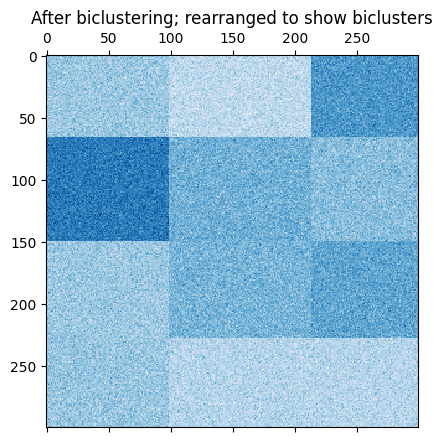

In [12]:
# Plotting result

## Reordering first the rows and then the columns
reordered_rows = data[np.argsort(model.row_labels_)]
reordered_data = reordered_rows[:, np.argsort(model.column_labels_)]

plt.matshow(reordered_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
plt.show()

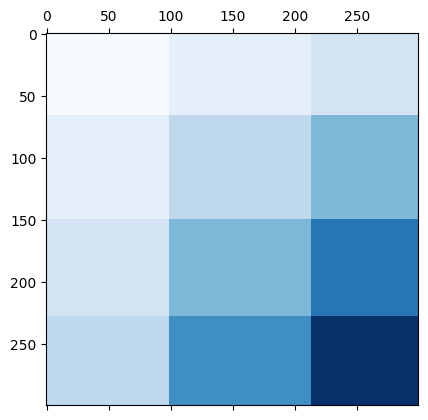

In [14]:
plt.matshow(
    np.outer(np.sort(model.row_labels_)+1, np.sort(model.column_labels_)+1),
    cmap=plt.cm.Blues
)

# EX2) A demo of the Spectral Co-Clustering algorithm

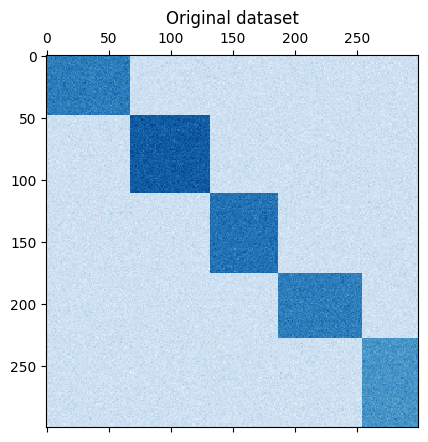

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import SpectralCoclustering
from sklearn.datasets import make_biclusters
from sklearn.metrics import consensus_score

data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5, shuffle=False, random_state=0
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
plt.show()

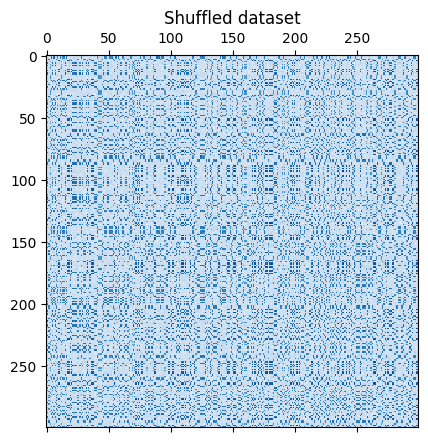

In [17]:
## Shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
plt.show()

In [21]:
model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

print(f"consensus_score: {score:.3f}")

consensus_score: 0.030


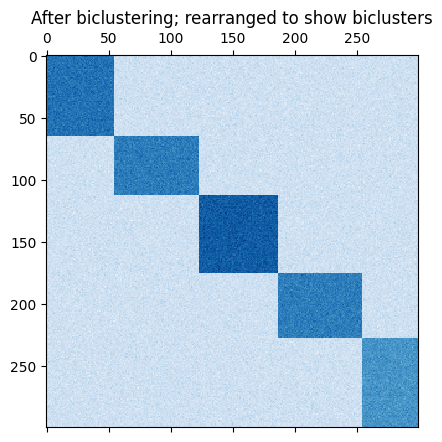

In [22]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

# EX3) Biclustering documents with the Spectral Co-clustering algorithm

* 뉴스 데이터 세트 이용. 문서-단어 바이클러스터 (부분집합 문서에서 더 자주 사용되는 부분집합 단어)
 -> MiniBatch KMeans로 클러스터링 한 결과와 비교

In [23]:
import operator
from collections import defaultdict
from time import time

import numpy as np

from sklearn.cluster import MiniBatchKMeans, SpectralCoclustering
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
def number_normalizer(tokens):
    """Map all numeric tokens to a placeholer. 모든 숫자 토큰을 placeholder에 매핑합니다
    
    For many applications, tokens that begin with a number are not directly useful, 많은 적용에서 토큰은 직접적으로 유용하진 않지만
    but the fact that such a token exists can be relevant. 토큰의 존재가 연관되었다는 것을 의미할 수 있다
    By applying this form of dimensionality reduction, some methods may perform better. 이러한 형태를 적용하는 것은 차원을 축소하므로써 일부 방법은 수행 능력이 좋아질 수 있다.
    """
    return ("#NUMBER" if token[0].isdigit() else token for token in tokens)

In [25]:
class NumberNormalizingVectorizer(TfidfVectorizer):
    def build_tokenizer(self):
        tokenize = super().build_tokenizer()
        return lambda doc: list(number_normalizer(tokenize(doc)))

In [31]:
# exclude 'comp.os.ms-windows.misc'
categories = [
    "alt.atheism",
    "comp.graphics",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware",
    "comp.windows.x",
    "misc.forsale",
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "rec.sport.hockey",
    "sci.crypt",
    "sci.electronics",
    "sci.med",
    "sci.space",
    "soc.religion.christian",
    "talk.politics.guns",
    "talk.politics.mideast",
    "talk.politics.misc",
    "talk.religion.misc",
]

In [35]:
newsgroups = fetch_20newsgroups(categories=categories)
y_true = newsgroups.target

HTTPError: HTTP Error 403: Forbidden

* 403 에러로 일단 보류. 